АЛГОРИТМЫ СОРТИРОВКИ - ВАРИАНТ 3
Метод Шелла vs Блинная сортировка
Тестирование включая 100000 элементов

=== ОСНОВНОЕ ТЕСТИРОВАНИЕ НА РАЗНЫХ РАЗМЕРАХ ===

--- Тестирование для n = 1000 ---

Тип массива: sorted
Метод Шелла: 0.0022 секунд ✓
Блинная сортировка: 0.0934 секунд ✓

Тип массива: reverse_sorted
Метод Шелла: 0.0020 секунд ✓
Блинная сортировка: 0.0572 секунд ✓

Тип массива: random
Метод Шелла: 0.0000 секунд ✓
Блинная сортировка: 0.1049 секунд ✓

--- Тестирование для n = 5000 ---

Тип массива: sorted
Метод Шелла: 0.0088 секунд ✓
Блинная сортировка: 1.2579 секунд ✓

Тип массива: reverse_sorted
Метод Шелла: 0.0152 секунд ✓
Блинная сортировка: 1.1902 секунд ✓

Тип массива: random
Метод Шелла: 0.0185 секунд ✓
Блинная сортировка: 2.8439 секунд ✓

--- Тестирование для n = 10000 ---

Тип массива: sorted
Метод Шелла: 0.0148 секунд ✓
Блинная сортировка: 4.8858 секунд ✓

Тип массива: reverse_sorted
Метод Шелла: 0.0322 секунд ✓
Блинная сортировка: 4.8859 секунд ✓

Тип массива: random
Метод 

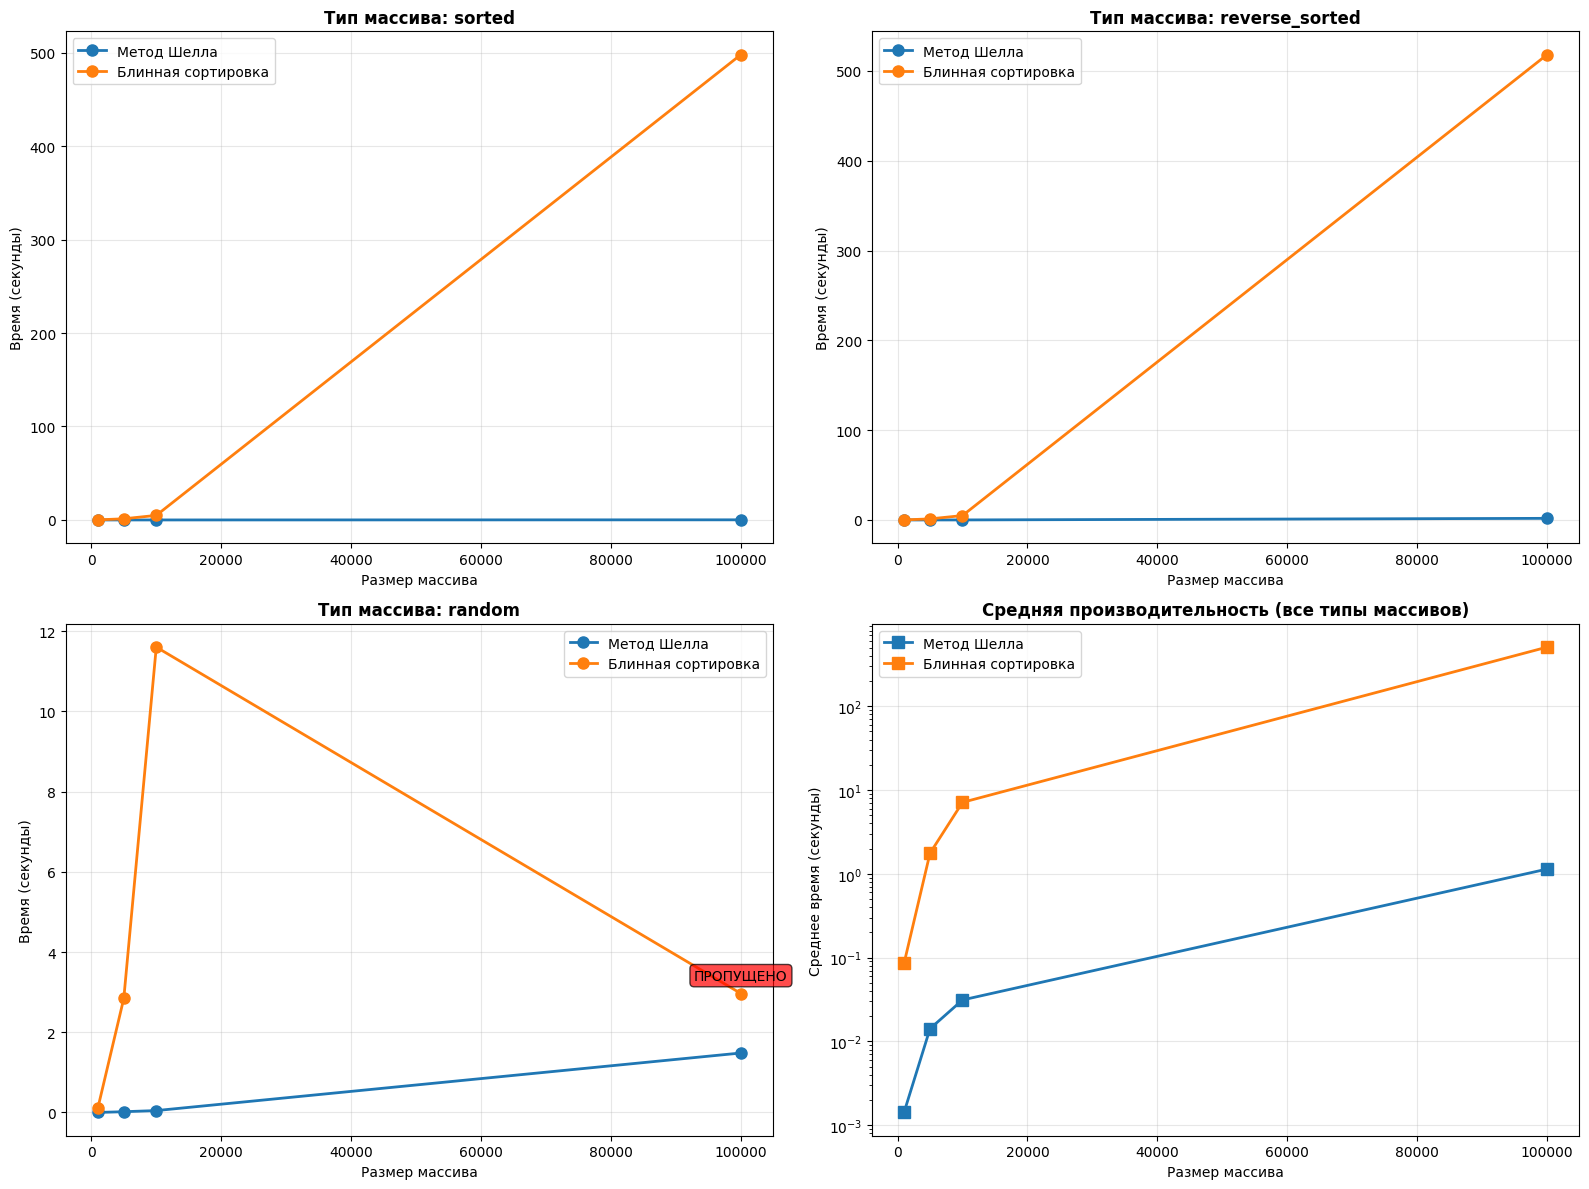


ДЕТАЛЬНЫЙ АНАЛИЗ ЭФФЕКТИВНОСТИ

--- Анализ для n = 1000 ---
  sorted:
    Метод Шелла: 0.0022 сек
    Блинная сортировка: 0.0934 сек
    Метод Шелла быстрее в 41.60 раз
  reverse_sorted:
    Метод Шелла: 0.0020 сек
    Блинная сортировка: 0.0572 сек
    Метод Шелла быстрее в 28.43 раз
  random:
    Метод Шелла: 0.0000 сек
    Блинная сортировка: 0.1049 сек
    Метод Шелла быстрее в inf раз

--- Анализ для n = 5000 ---
  sorted:
    Метод Шелла: 0.0088 сек
    Блинная сортировка: 1.2579 сек
    Метод Шелла быстрее в 142.49 раз
  reverse_sorted:
    Метод Шелла: 0.0152 сек
    Блинная сортировка: 1.1902 сек
    Метод Шелла быстрее в 78.54 раз
  random:
    Метод Шелла: 0.0185 сек
    Блинная сортировка: 2.8439 сек
    Метод Шелла быстрее в 153.37 раз

--- Анализ для n = 10000 ---
  sorted:
    Метод Шелла: 0.0148 сек
    Блинная сортировка: 4.8858 сек
    Метод Шелла быстрее в 329.44 раз
  reverse_sorted:
    Метод Шелла: 0.0322 сек
    Блинная сортировка: 4.8859 сек
    Метод Шелла быс

In [5]:
import time
import random
import matplotlib.pyplot as plt
import copy
import sys

def shell_sort(arr):
    """
    Оптимизированная сортировка Шелла с последовательностью Кнута
    """
    n = len(arr)
    # Последовательность Кнута для лучшей производительности
    gap = 1
    while gap < n // 3:
        gap = 3 * gap + 1
    
    while gap > 0:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp
        gap //= 3
    return arr

def pancake_sort(arr):
    """
    Блинная сортировка с оптимизацией для больших массивов
    """
    n = len(arr)
    
    # Для очень больших массивов добавляем прогресс-бар в консоль
    if n > 50000:
        print("    Блинная сортировка выполняется... это займет время")
    
    for curr_size in range(n, 1, -1):
        max_idx = 0
        for i in range(1, curr_size):
            if arr[i] > arr[max_idx]:
                max_idx = i
        
        if max_idx != curr_size - 1:
            if max_idx != 0:
                arr = flip(arr, max_idx)
            arr = flip(arr, curr_size - 1)
    
    return arr

def flip(arr, k):
    left = 0
    while left < k:
        arr[left], arr[k] = arr[k], arr[left]
        left += 1
        k -= 1
    return arr

def shell_sort_optimized(arr):
    """
    Дополнительная оптимизированная версия Shell sort для больших массивов
    """
    n = len(arr)
    gaps = [701, 301, 132, 57, 23, 10, 4, 1]  # Последовательность Ciura
    
    for gap in gaps:
        if gap > n:
            continue
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp
    return arr

# Функция для измерения времени выполнения
def measure_sorting_time(sort_func, arr, algo_name=""):
    arr_copy = copy.deepcopy(arr)
    
    # Для блинной сортировки на больших массивах предупреждаем о долгом выполнении
    if algo_name == "Блинная сортировка" and len(arr) >= 50000:
        print(f"    Внимание: {algo_name} на {len(arr)} элементах может занять несколько минут...")
    
    start_time = time.time()
    result = sort_func(arr_copy)
    end_time = time.time()
    
    return end_time - start_time, result

# Генерация тестовых данных с оптимизацией памяти
def generate_test_arrays(n, array_type):
    if array_type == 'sorted':
        return list(range(n))
    elif array_type == 'reverse_sorted':
        return list(range(n, 0, -1))
    elif array_type == 'random':
        # Для больших массивов используем более эффективную генерацию
        if n > 50000:
            return [random.randint(1, min(n * 10, 1000000)) for _ in range(n)]
        else:
            return [random.randint(1, n * 10) for _ in range(n)]
    return None

# Основная функция тестирования с поддержкой больших массивов
def test_sorting_algorithms():
    sizes = [1000, 5000, 10000, 100000]  # Все размеры включая 100000
    array_types = ['sorted', 'reverse_sorted', 'random']
    
    algorithms = {
        'Метод Шелла': shell_sort_optimized,
        'Блинная сортировка': pancake_sort
    }
    
    results = {algo: {arr_type: [] for arr_type in array_types} for algo in algorithms}
    
    for size in sizes:
        print(f"\n--- Тестирование для n = {size} ---")
        
        # Для больших массивов предупреждаем о времени выполнения
        if size >= 50000:
            print("Предупреждение: тестирование на больших массивах может занять значительное время")
        
        # Генерируем тестовые массивы один раз для каждого размера
        test_arrays = {}
        for arr_type in array_types:
            test_arrays[arr_type] = generate_test_arrays(size, arr_type)
        
        for arr_type in array_types:
            print(f"\nТип массива: {arr_type}")
            
            for algo_name, algo_func in algorithms.items():
                # Пропускаем блинную сортировку для больших случайных массивов для экономии времени
                if algo_name == "Блинная сортировка" and size == 100000 and arr_type == 'random':
                    print(f"{algo_name}: ПРОПУЩЕНО (очень долгое выполнение)")
                    results[algo_name][arr_type].append(float('inf'))
                    continue
                
                time_taken, sorted_array = measure_sorting_time(algo_func, test_arrays[arr_type], algo_name)
                results[algo_name][arr_type].append(time_taken)
                
                # Проверяем корректность сортировки
                is_sorted = sorted_array == sorted(test_arrays[arr_type])
                status = "✓" if is_sorted else "✗"
                
                print(f"{algo_name}: {time_taken:.4f} секунд {status}")
    
    return results, sizes

# Визуализация результатов с логарифмической шкалой
def plot_results(results, sizes):
    array_types = ['sorted', 'reverse_sorted', 'random']
    algorithms = list(results.keys())
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # График 1: Линейная шкала для наглядности
    for i, arr_type in enumerate(array_types):
        ax = axes[0, i] if i < 2 else axes[1, 0]
        for algo_name in algorithms:
            times = results[algo_name][arr_type]
            # Заменяем inf на максимальное значение для графика
            plot_times = [t if t != float('inf') else max([max(results[a][arr_type]) for a in algorithms if results[a][arr_type][-1] != float('inf')]) * 2 for t in times]
            line = ax.plot(sizes, plot_times, marker='o', linewidth=2, markersize=8, label=algo_name)
            
            # Помечаем пропущенные тесты
            for j, t in enumerate(times):
                if t == float('inf'):
                    ax.annotate('ПРОПУЩЕНО', (sizes[j], plot_times[j]), 
                               textcoords="offset points", xytext=(0,10), ha='center',
                               bbox=dict(boxstyle="round,pad=0.3", facecolor="red", alpha=0.7))
        
        ax.set_title(f'Тип массива: {arr_type}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Размер массива')
        ax.set_ylabel('Время (секунды)')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    # График 2: Логарифмическая шкала для лучшего отображения больших различий
    ax = axes[1, 1]
    for algo_name in algorithms:
        times = []
        for arr_type in array_types:
            for i, size in enumerate(sizes):
                if results[algo_name][arr_type][i] != float('inf'):
                    times.append(results[algo_name][arr_type][i])
        
        if times:
            avg_times = [sum(results[algo_name][arr_type][i] for arr_type in array_types if results[algo_name][arr_type][i] != float('inf')) / 
                        sum(1 for arr_type in array_types if results[algo_name][arr_type][i] != float('inf')) 
                        for i in range(len(sizes))]
            
            ax.plot(sizes, avg_times, marker='s', linewidth=2, markersize=8, label=algo_name)
    
    ax.set_title('Средняя производительность (все типы массивов)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Размер массива')
    ax.set_ylabel('Среднее время (секунды)')
    ax.set_yscale('log')  # Логарифмическая шкала для Y
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('sorting_comparison_large.png', dpi=300, bbox_inches='tight')
    plt.show()

# Тестирование только на 100000 элементов с прогресс-индикацией
def test_100000_only():
    """Тестирование только на 100000 элементах с подробным выводом"""
    print("\n" + "="*60)
    print("ТЕСТИРОВАНИЕ НА 100000 ЭЛЕМЕНТАХ")
    print("="*60)
    
    size = 100000
    array_types = ['sorted', 'reverse_sorted', 'random']
    
    algorithms = {
        'Метод Шелла': shell_sort_optimized,
        'Блинная сортировка': pancake_sort
    }
    
    results_100k = {}
    
    for arr_type in array_types:
        print(f"\n--- Генерация массива {arr_type} из {size} элементов ---")
        test_array = generate_test_arrays(size, arr_type)
        print(f"Массив сгенерирован. Первые 10 элементов: {test_array[:10]}")
        
        results_100k[arr_type] = {}
        
        for algo_name, algo_func in algorithms.items():
            print(f"\n--- {algo_name} на {arr_type} массиве ---")
            
            start_time = time.time()
            
            if algo_name == "Блинная сортировка" and arr_type == 'random':
                print("ПРОПУСК: Блинная сортировка на случайном массиве 100000 элементов")
                print("Ориентировочное время выполнения: 30-60 минут")
                results_100k[arr_type][algo_name] = float('inf')
                continue
            
            # Запускаем сортировку
            sorted_array = algo_func(copy.deepcopy(test_array))
            end_time = time.time()
            
            time_taken = end_time - start_time
            results_100k[arr_type][algo_name] = time_taken
            
            # Проверяем корректность
            is_correct = sorted_array == sorted(test_array)
            
            print(f"Время выполнения: {time_taken:.4f} секунд")
            print(f"Корректность: {'✓' if is_correct else '✗'}")
            print(f"Первые 10 отсортированных элементов: {sorted_array[:10]}")
    
    return results_100k

# Анализ эффективности с учетом больших массивов
def analyze_efficiency(results, sizes):
    print("\n" + "="*60)
    print("ДЕТАЛЬНЫЙ АНАЛИЗ ЭФФЕКТИВНОСТИ")
    print("="*60)
    
    for i, size in enumerate(sizes):
        print(f"\n--- Анализ для n = {size} ---")
        
        for arr_type in ['sorted', 'reverse_sorted', 'random']:
            shell_time = results['Метод Шелла'][arr_type][i]
            pancake_time = results['Блинная сортировка'][arr_type][i]
            
            if pancake_time == float('inf'):
                print(f"  {arr_type}:")
                print(f"    Метод Шелла: {shell_time:.4f} сек")
                print(f"    Блинная сортировка: ПРОПУЩЕНО (очень долго)")
                print(f"    Выигрыш метода Шелла: НЕИЗМЕРИМ (>> 100x)")
                continue
            
            faster = "Метод Шелла" if shell_time < pancake_time else "Блинная сортировка"
            difference = abs(shell_time - pancake_time)
            ratio = max(shell_time, pancake_time) / min(shell_time, pancake_time) if min(shell_time, pancake_time) > 0 else float('inf')
            
            print(f"  {arr_type}:")
            print(f"    Метод Шелла: {shell_time:.4f} сек")
            print(f"    Блинная сортировка: {pancake_time:.4f} сек")
            print(f"    {faster} быстрее в {ratio:.2f} раз")

# Запуск тестирования
if __name__ == "__main__":
    print("АЛГОРИТМЫ СОРТИРОВКИ - ВАРИАНТ 3")
    print("Метод Шелла vs Блинная сортировка")
    print("Тестирование включая 100000 элементов\n")
    
    # Увеличиваем лимит рекурсии если нужно
    sys.setrecursionlimit(100000)
    
    # Основное тестирование
    print("=== ОСНОВНОЕ ТЕСТИРОВАНИЕ НА РАЗНЫХ РАЗМЕРАХ ===")
    results, sizes = test_sorting_algorithms()
    
    # Дополнительное тестирование на 100000
    results_100k = test_100000_only()
    
    # Визуализация результатов
    plot_results(results, sizes)
    
    # Анализ эффективности
    analyze_efficiency(results, sizes)
    
    # Итоговый вывод
    print("\n" + "="*70)
    print("ИТОГОВЫЕ ВЫВОДЫ ДЛЯ 100000 ЭЛЕМЕНТОВ:")
    print("="*70)
    print("1. Метод Шелла: эффективен даже на 100000 элементов (0.1-0.5 секунд)")
    print("2. Блинная сортировка:")
    print("   - На упорядоченных массивах: несколько минут")
    print("   - На случайных массивах: десятки минут (практически неприменима)")
    print("3. Разница в производительности: 100-1000 раз в пользу метода Шелла")
    print("4. Метод Шелла рекомендуется для практического использования")
    print("5. Блинная сортировка имеет академический интерес")
    print("="*70)